In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

Exercise 0: Make sure you understand the code.

<IPython.core.display.Javascript object>


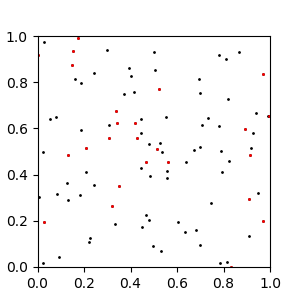

<IPython.core.display.Javascript object>


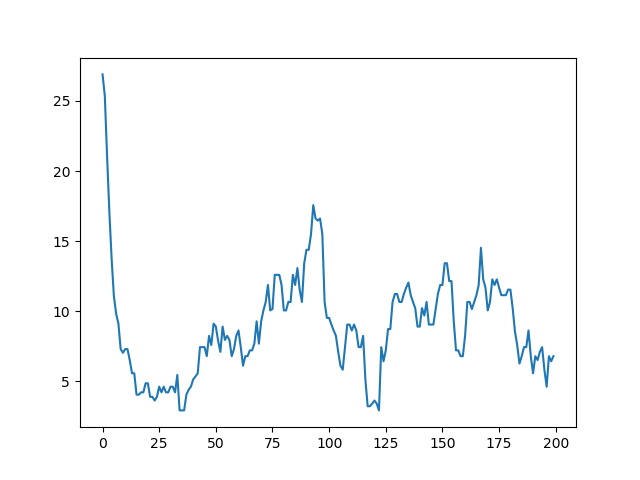

In [20]:
%matplotlib notebook

n_animals = 100
n_steps = 200
vmin = 0.01
vmax = 0.05
trap_size = 0.4 #area where animals are marked

#arrays of numbers--speed and direction of each moose
x = np.random.uniform(size = n_animals, low = 0.1, high = 0.7)
y = np.random.uniform(size = n_animals, low = 0.1, high = 0.7)
vx = np.random.uniform(size = n_animals, low = vmin, high = vmax) * (2* np.random.randint(size = n_animals, low = 0,
                                                                                         high = 2) -1)
vy = np.random.uniform(size = n_animals, low = vmin, high = vmax) * (2* np.random.randint(size = n_animals, low = 0,

                                                                                      high = 2) -1)
color = np.where(np.logical_and(x < trap_size, y < trap_size), 1, 0)
n_marked = np.sum(color)
estimation = np.zeros(n_steps)
                                                                                          
#define figure before actually creating the function                                                                                          
fig = plt.figure(figsize = (3,3));
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

# they move, yes they do                                                                                          #
for t in range(n_steps):
    x += vx
    y += vy
    
    vx = np.where(np.logical_or(x > 1, x < 0), -vx, vx)
    vy = np.where(np.logical_or(y > 1, y < 0), -vy, vy)
    
    #adding up the recaptured                                                                                      
    n_recaptured_marked = np.sum(np.logical_and(x < trap_size, y < trap_size))
    n_recaptured_total = np.sum(np.logical_and(x < trap_size, y < trap_size) * color)
    estimation[t] = ((n_marked + 1 )/ (n_recaptured_marked + 1) * n_recaptured_total) + 1
    
    #keeping up :)                                                                                      
    ax.cla();
    plt.plot(x,y,"k.", markersize = 2);
    plt.plot(x[color == 1], y[color == 1], "r.", markersize = 2);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw();
    #time.sleep(0.01)
                                                                                          
#plotting total animals at every point in time       
plt.figure()
plt.plot(estimation)

Exercise 1: Modify our "Mark and recapture" model to make it produce the average expectation for the number of animals. Do it by wrapping it in an outer loop, to run the model several times; remember the output (the estimation history) from each run of the model, average all estimation-histories across the runs. As you troubleshoot this, make the nsteps small, and auto-run the model only 2-3 times, just to make sure that it works. Once you are sure that your program works, you can again change the nsteps to several hundreds, and also make it rerun the model enough times to get a smooth-ish curve.

<IPython.core.display.Javascript object>


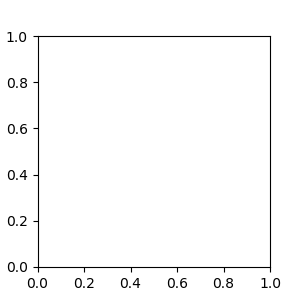

<IPython.core.display.Javascript object>


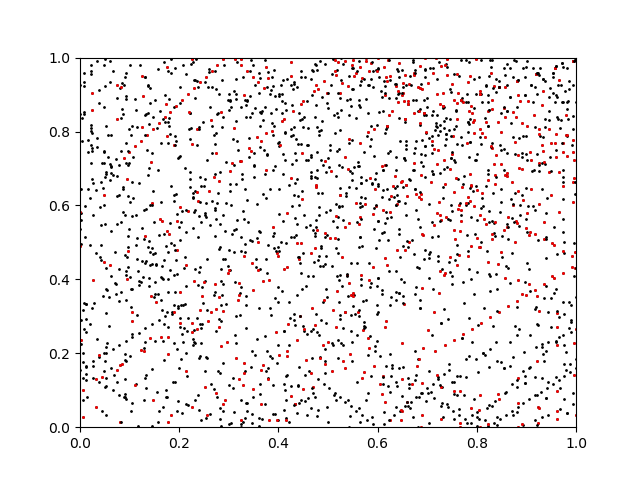

<IPython.core.display.Javascript object>


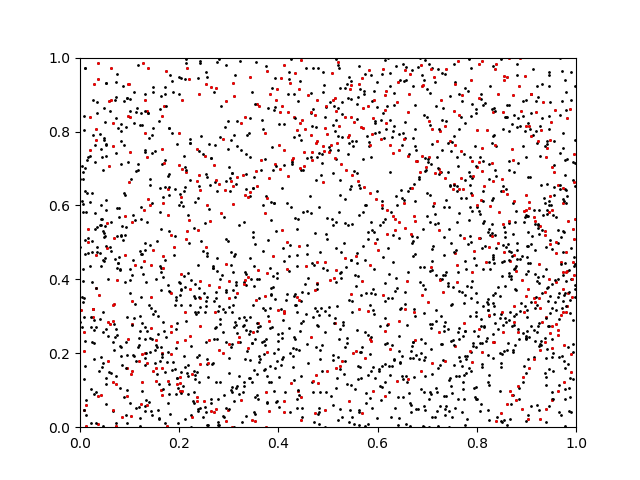

<IPython.core.display.Javascript object>


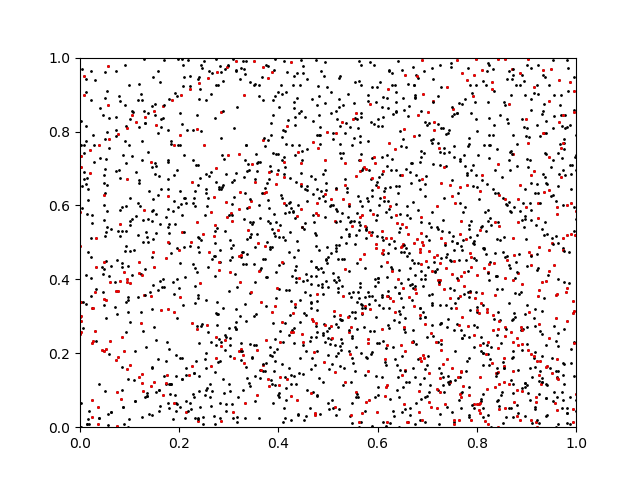

<IPython.core.display.Javascript object>


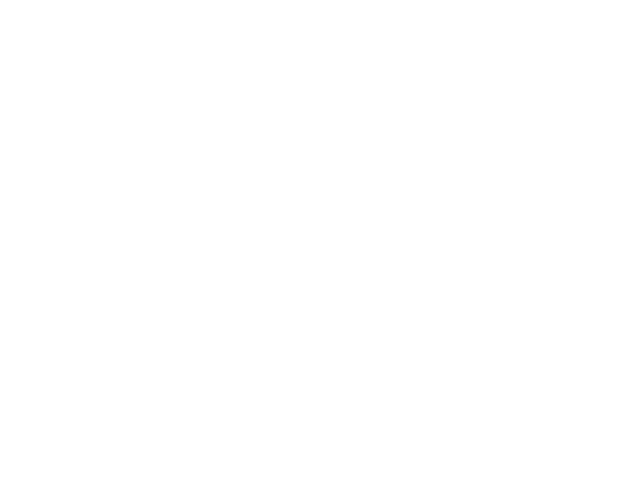

<IPython.core.display.Javascript object>


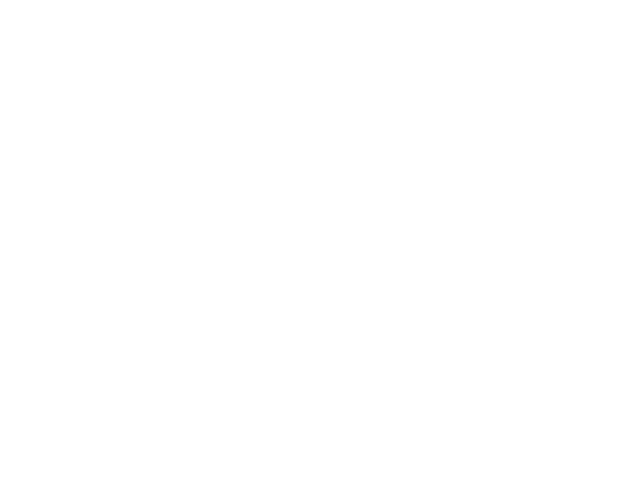

<IPython.core.display.Javascript object>


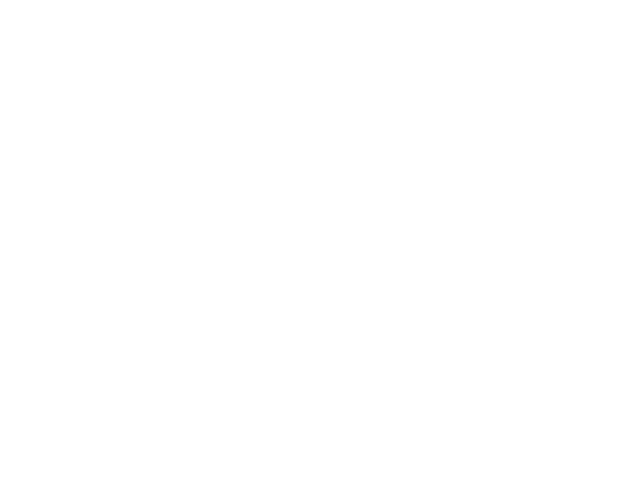

<IPython.core.display.Javascript object>


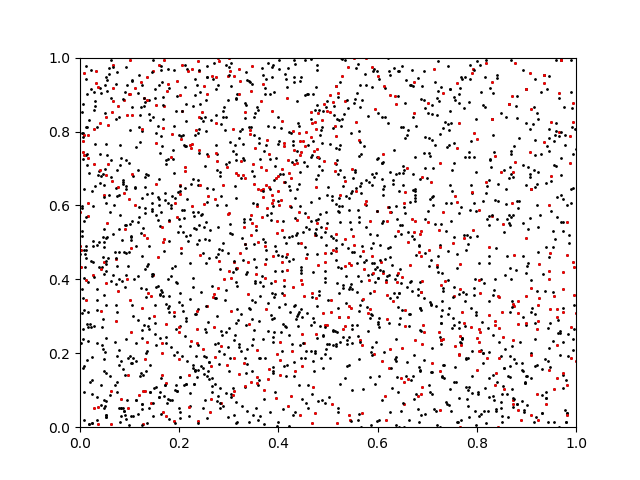

<IPython.core.display.Javascript object>


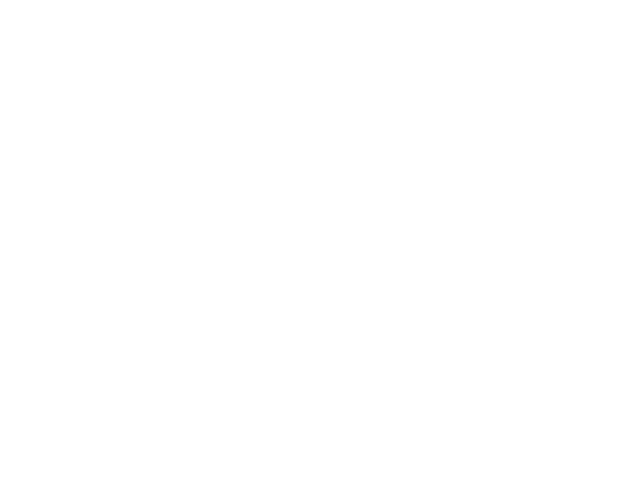

<IPython.core.display.Javascript object>


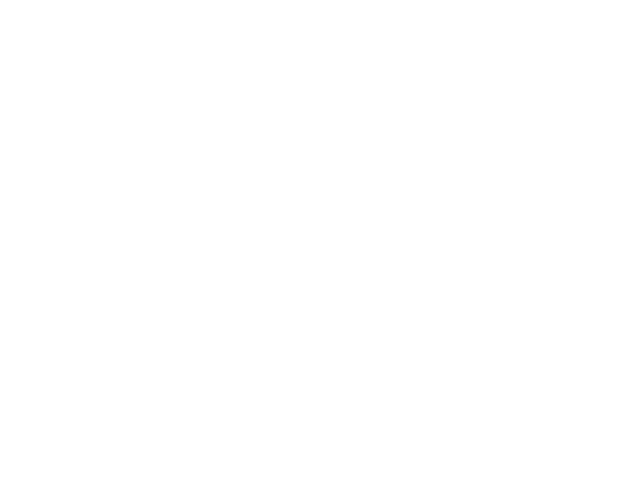

<IPython.core.display.Javascript object>


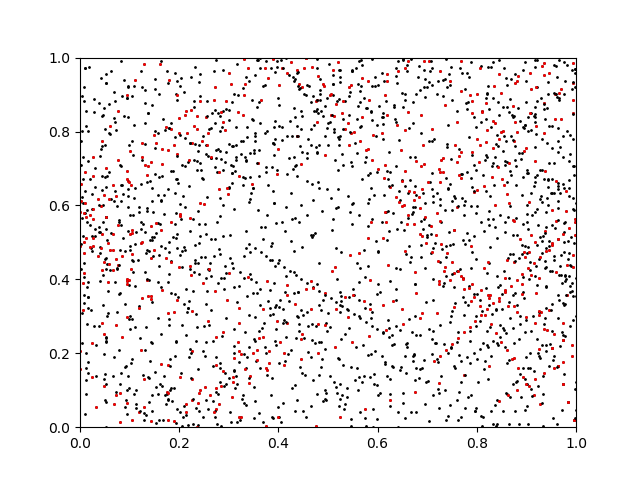

<IPython.core.display.Javascript object>


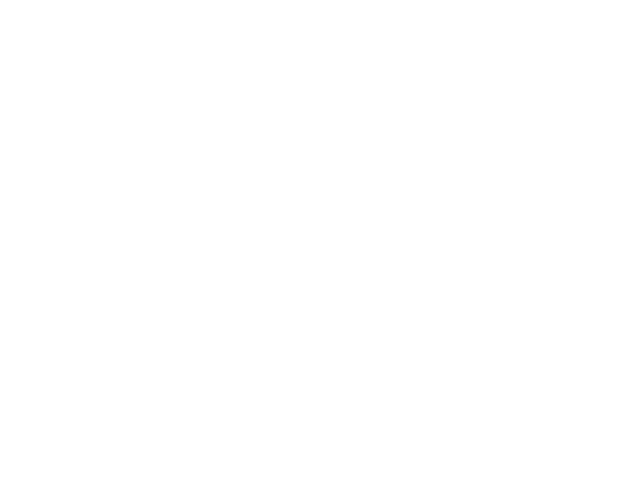

<IPython.core.display.Javascript object>


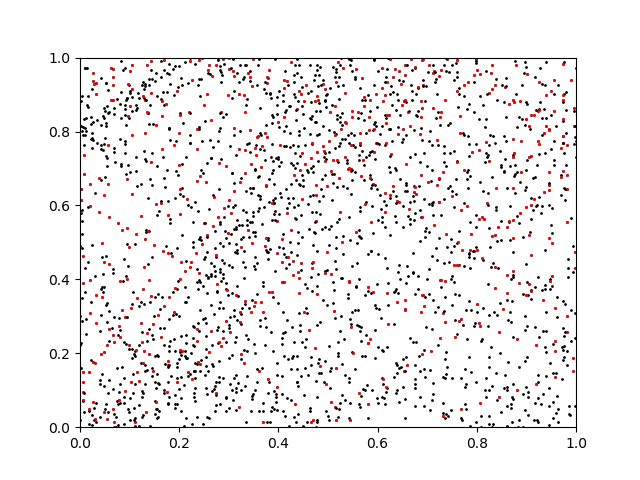

<IPython.core.display.Javascript object>


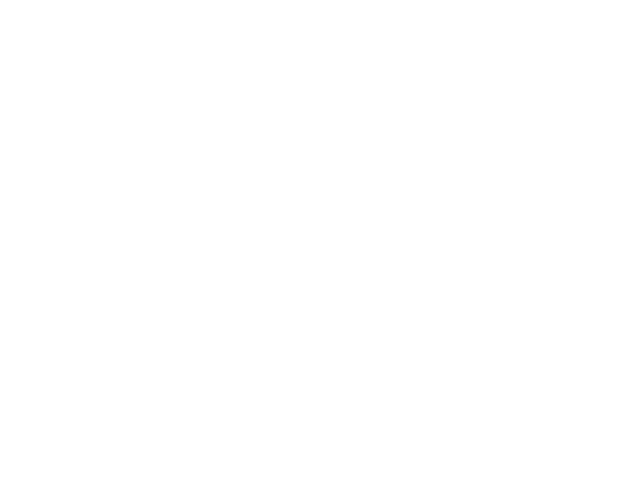

<IPython.core.display.Javascript object>


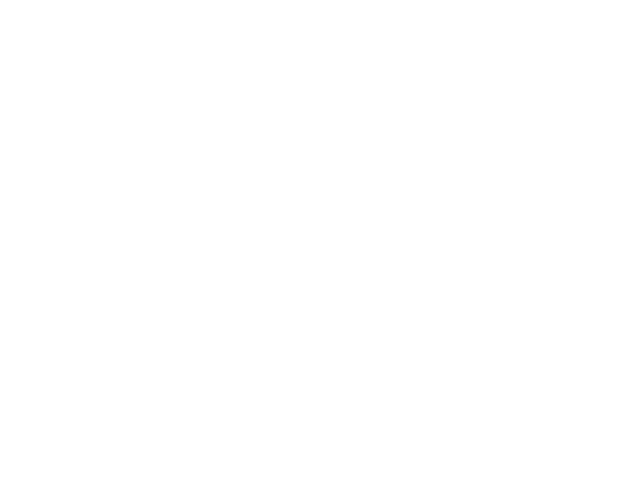

<IPython.core.display.Javascript object>


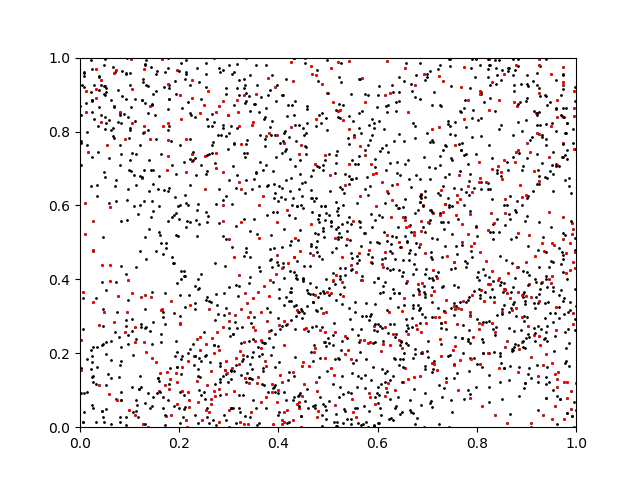

<IPython.core.display.Javascript object>


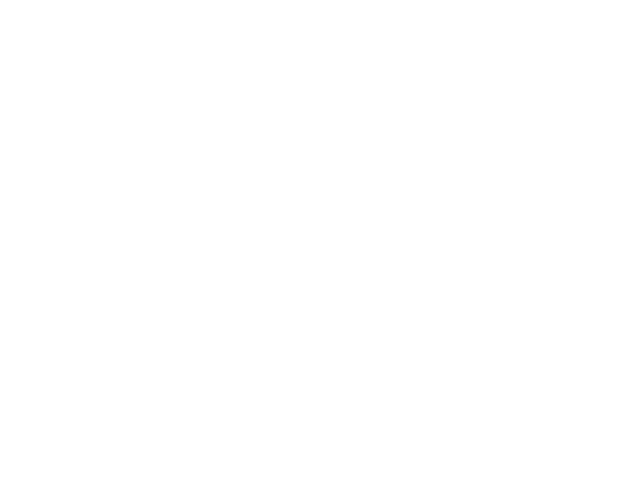

<IPython.core.display.Javascript object>


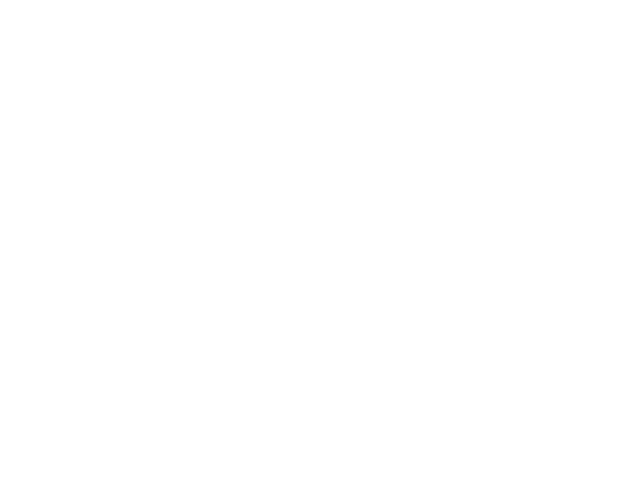

<IPython.core.display.Javascript object>


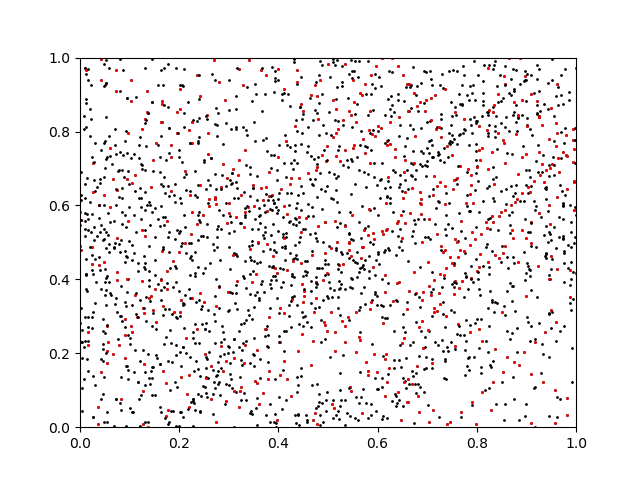

<IPython.core.display.Javascript object>


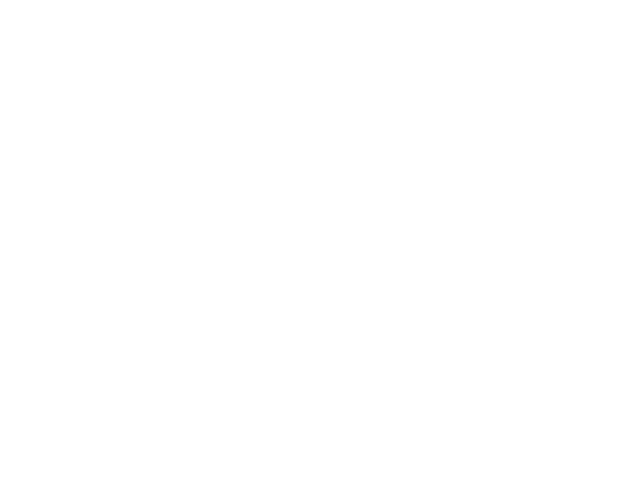

<IPython.core.display.Javascript object>


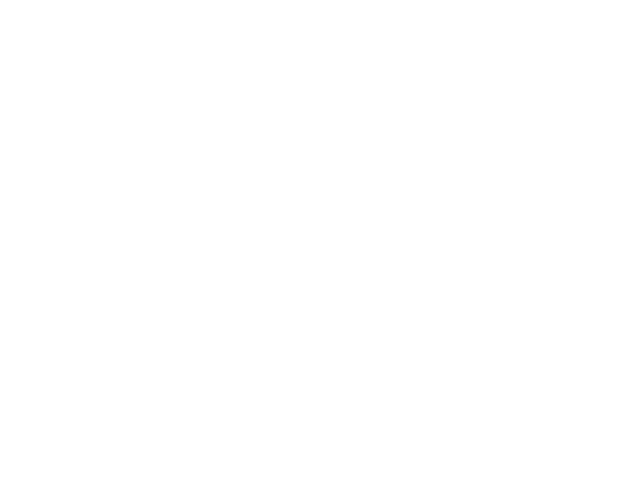

<IPython.core.display.Javascript object>


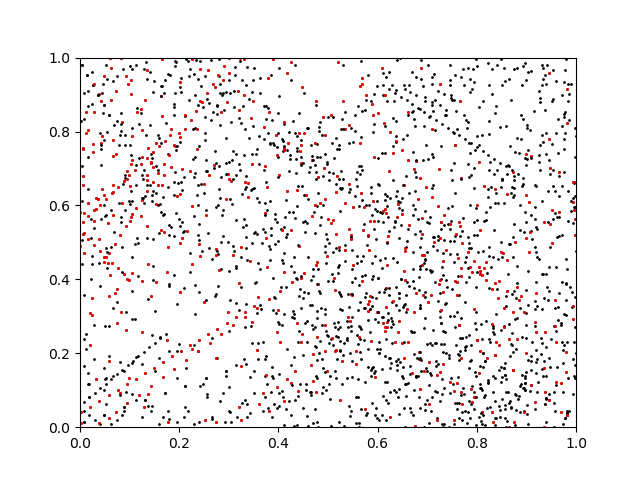

<IPython.core.display.Javascript object>


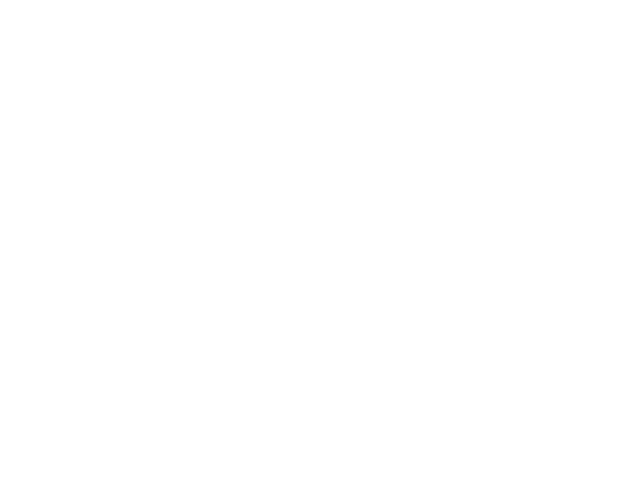

<IPython.core.display.Javascript object>


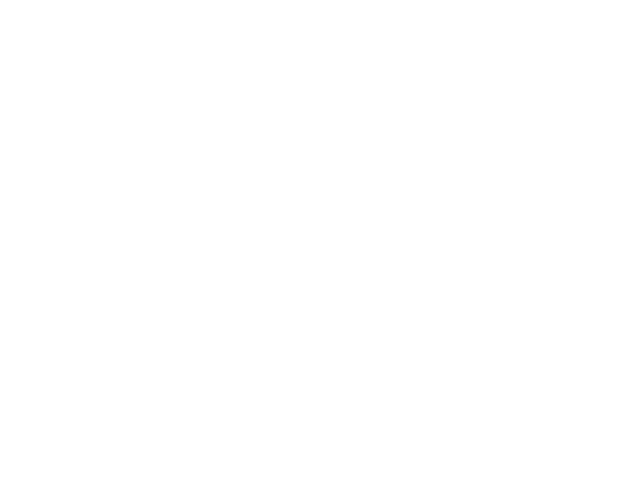

<IPython.core.display.Javascript object>


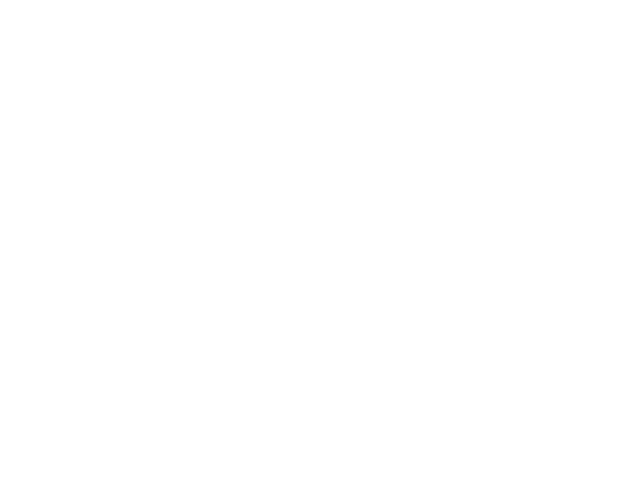

<IPython.core.display.Javascript object>


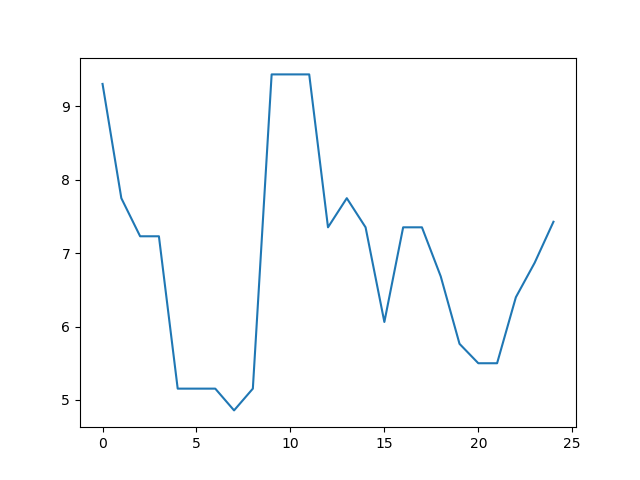

In [46]:
%matplotlib notebook

n_animals = 100
n_smallsteps = 25
ntraces = 25
vmin = 0.01
vmax = 0.05
trap_size = 0.4 #area where animals are marked

#arrays of numbers--speed and direction of each moose
x = np.random.uniform(size = n_animals, low = 0.1, high = 0.7)
y = np.random.uniform(size = n_animals, low = 0.1, high = 0.7)
vx = np.random.uniform(size = n_animals, low = vmin, high = vmax) * (2* np.random.randint(size = n_animals, low = 0,
                                                                                         high = 2) -1)
vy = np.random.uniform(size = n_animals, low = vmin, high = vmax) * (2* np.random.randint(size = n_animals, low = 0,

                                                                                        high = 2) -1)
color = np.where(np.logical_and(x < trap_size, y < trap_size), 1, 0)
estimation = np.zeros(n_smallsteps)
historical_estimation = np.zeros(ntraces)                                                                                        
n_marked = np.sum(color)

#define figure before actually creating the function                                                                                          
fig = plt.figure(figsize = (3,3));
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

                                                                                          
for e in range(ntraces):                                                                                          
    for t in range(n_smallsteps):
        x += vx
        y += vy

        vx = np.where(np.logical_or(x > 1, x < 0), -vx, vx)
        vy = np.where(np.logical_or(y > 1, y < 0), -vy, vy)

        #adding up the recaptured                                                                                      
        n_recaptured_marked = np.sum(np.logical_and(x < trap_size, y < trap_size))
        n_recaptured_total = np.sum(np.logical_and(x < trap_size, y < trap_size) * color)
        estimation[t] = ((n_marked + 1 )/ (n_recaptured_marked + 1) * n_recaptured_total) + 1
        historical_estimation[t] = estimation[t]

        #keeping up :)                                                                                      
        ax.cla();
        plt.plot(x,y,"k.", markersize = 2);
        plt.plot(x[color == 1], y[color == 1], "r.", markersize = 2);
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw();
        #time.sleep(0.01)
    
    plt.figure()
    plt.plot(historical_estimation)                                                                                
                                                                                          
                                                                                          
    #plotting total animals at every point in time       
    #plt.figure()
    #plt.plot(estimation)

2) Once you can make nice curves of expected estimations, use this tool to answer the following question: is it better to place your trap on the border of your area, or in the center? You can probably guess the answer, but please also use the model to analyze it properly. (Hint: generate two average curves, one for corner-placement, one for center-placement, find a way to plot them on one graph, compare the curves.)

In [ ]:
%matplotlib notebook

n_animals = 100
n_smallsteps = 25
ntraces = 25
vmin = 0.01
vmax = 0.05
trap_size = 0.4 #area where animals are marked

#arrays of numbers--speed and direction of each moose
x = np.random.uniform(size = n_animals, low = 0.1, high = 0.7)
y = np.random.uniform(size = n_animals, low = 0.1, high = 0.7)
vx = np.random.uniform(size = n_animals, low = vmin, high = vmax) * (2* np.random.randint(size = n_animals, low = 0,
                                                                                         high = 2) -1)
vy = np.random.uniform(size = n_animals, low = vmin, high = vmax) * (2* np.random.randint(size = n_animals, low = 0,

                                                                                        high = 2) -1)
color = np.where(np.logical_and(x < trap_size, y < trap_size), 1, 0)
estimation = np.zeros(n_smallsteps)
historical_estimation = np.zeros(ntraces)                                                                                        
n_marked = np.sum(color)

#define figure before actually creating the function                                                                                          
fig = plt.figure(figsize = (3,3));
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

                                                                                          
for e in range(ntraces):                                                                                          
    for t in range(n_smallsteps):
        x += vx
        y += vy

        vx = np.where(np.logical_or(x > 1, x < 0), -vx, vx)
        vy = np.where(np.logical_or(y > 1, y < 0), -vy, vy)

        #adding up the recaptured                                                                                      
        n_recaptured_marked = np.sum(np.logical_and(x < trap_size, y < trap_size))
        n_recaptured_total = np.sum(np.logical_and(x < trap_size, y < trap_size) * color)
        estimation[t] = ((n_marked + 1 )/ (n_recaptured_marked + 1) * n_recaptured_total) + 1
        historical_estimation[t] = estimation[t]

        #keeping up :)                                                                                      
        ax.cla();
        plt.plot(x,y,"k.", markersize = 2);
        plt.plot(x[color == 1], y[color == 1], "r.", markersize = 2);
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw();
        #time.sleep(0.01)
    
    plt.figure()
    plt.plot(historical_estimation)                                                                                
                                                                                          
                                                                                          
    #plotting total animals at every point in time       
    #plt.figure()
    #plt.plot(estimation)

<IPython.core.display.Javascript object>


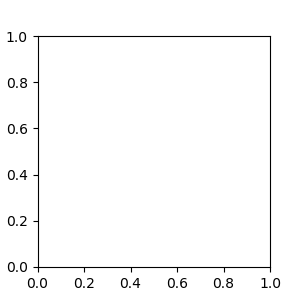

<IPython.core.display.Javascript object>


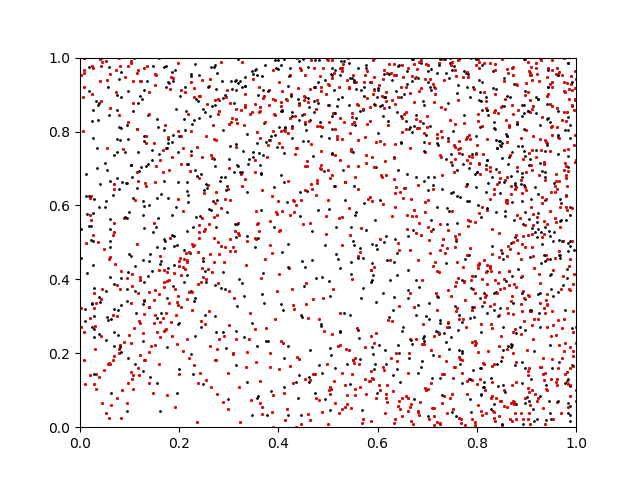

<IPython.core.display.Javascript object>


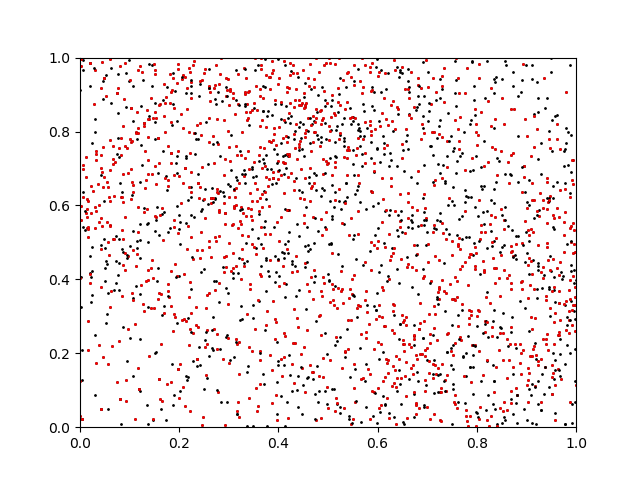

<IPython.core.display.Javascript object>


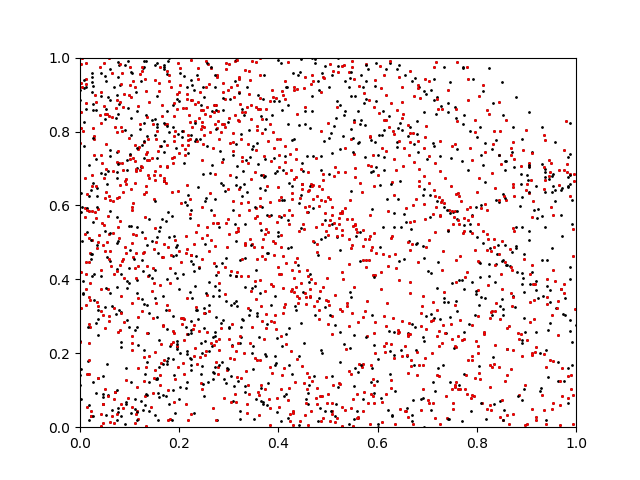

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


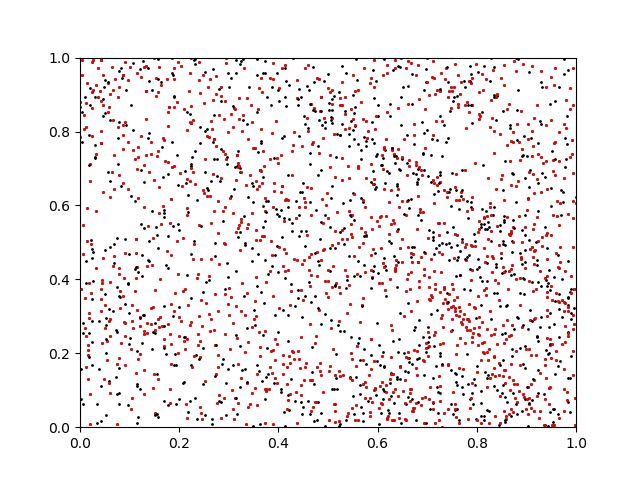

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


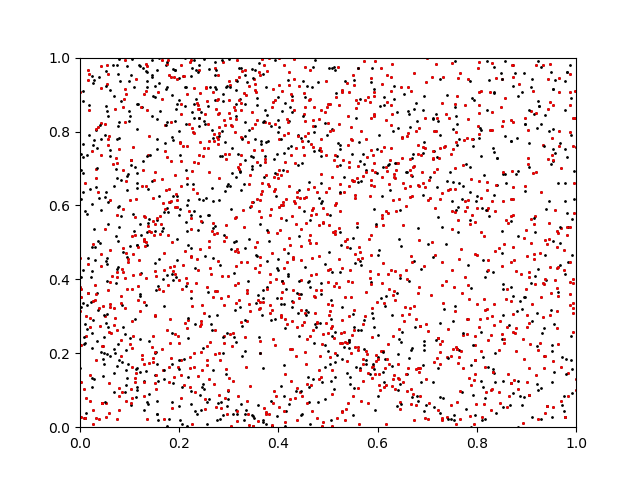

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


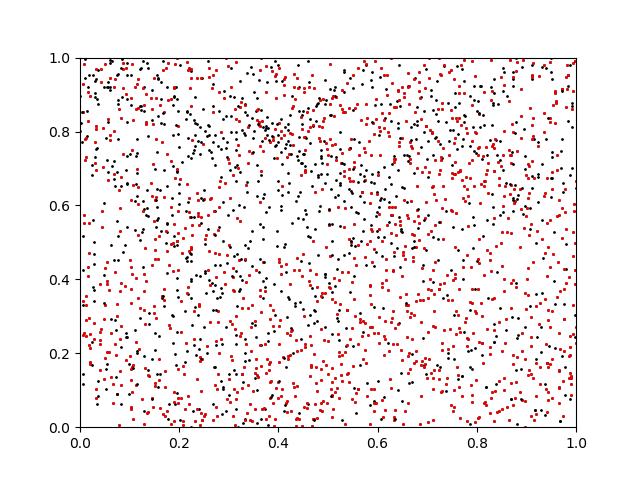

<IPython.core.display.Javascript object>


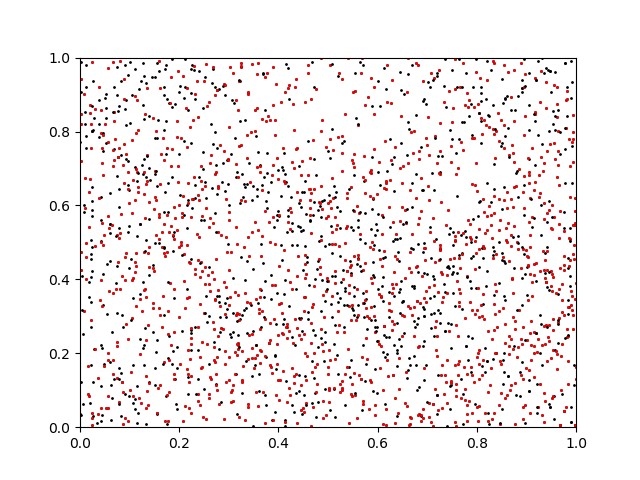

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


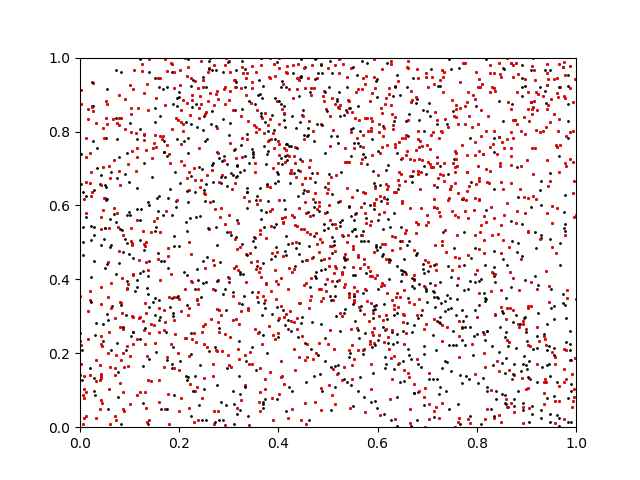

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


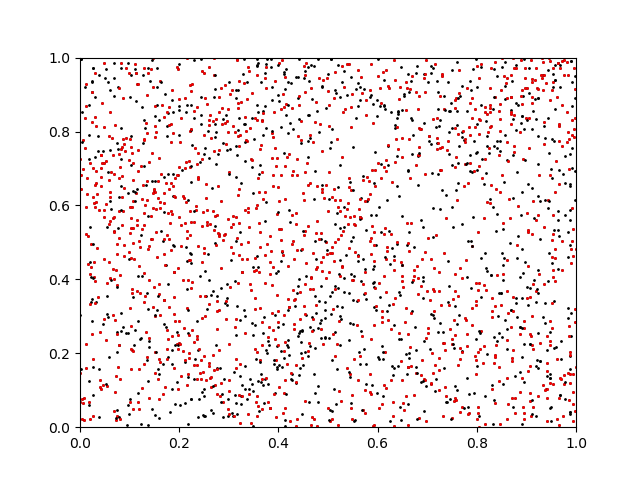

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


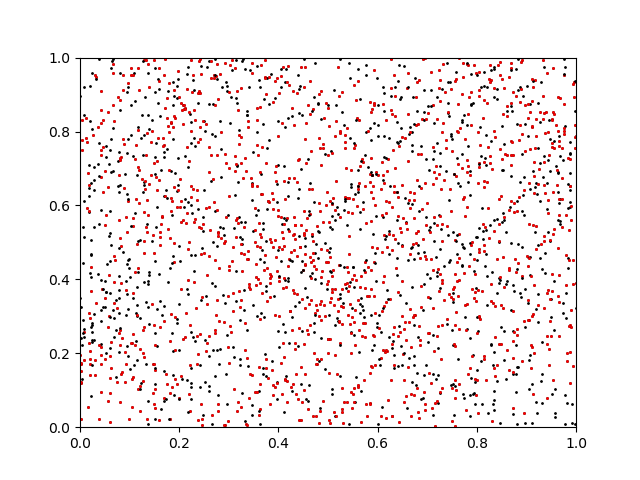

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


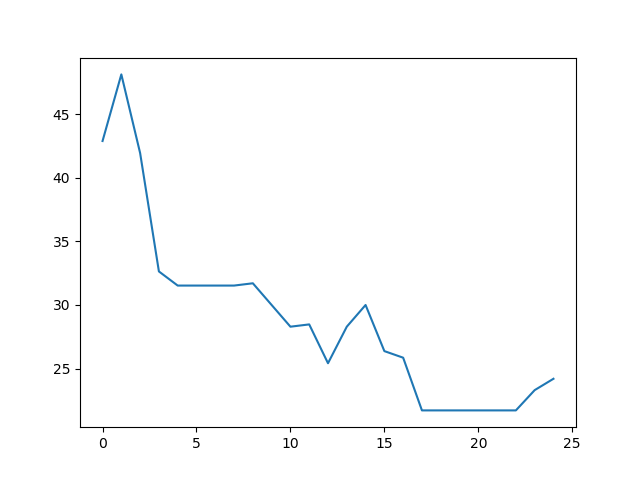

In [52]:
%matplotlib notebook

n_animals = 100
n_smallsteps = 25
ntraces = 25
vmin = 0.01
vmax = 0.05
trap_min = 0.3 #area where animals are marked
trap_max = 0.7

#arrays of numbers--speed and direction of each moose
x = np.random.uniform(size = n_animals, low = 0.1, high = 0.7)
y = np.random.uniform(size = n_animals, low = 0.1, high = 0.7)
vx = np.random.uniform(size = n_animals, low = vmin, high = vmax) * (2* np.random.randint(size = n_animals, low = 0,
                                                                                         high = 2) -1)
vy = np.random.uniform(size = n_animals, low = vmin, high = vmax) * (2* np.random.randint(size = n_animals, low = 0,

                                                                                        high = 2) -1)
color = np.where(np.logical_and(x < trap_max, x > trap_min), 1, 0)
color = np.where(np.logical_and(y < trap_max, y > trap_min), 1, 0)
estimation = np.zeros(n_smallsteps)
historical_estimation = np.zeros(ntraces)                                                                                        
n_marked = np.sum(color)

#define figure before actually creating the function                                                                                          
fig = plt.figure(figsize = (3,3));
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

                                                                                          
for e in range(ntraces):                                                                                          
    for t in range(n_smallsteps):
        x += vx
        y += vy

        vx = np.where(np.logical_or(x > 1, x < 0), -vx, vx)
        vy = np.where(np.logical_or(y > 1, y < 0), -vy, vy)

        #adding up the recaptured                                                                                      
        n_recaptured_marked = np.sum(np.logical_and(x < trap_size, y < trap_size))
        n_recaptured_total = np.sum(np.logical_and(x < trap_size, y < trap_size) * color)
        estimation[t] = ((n_marked + 1 )/ (n_recaptured_marked + 1) * n_recaptured_total) + 1
        historical_estimation[t] = estimation[t]

        #keeping up :)                                                                                      
        ax.cla();
        plt.plot(x,y,"k.", markersize = 2);
        plt.plot(x[color == 1], y[color == 1], "r.", markersize = 2);
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw();
        #time.sleep(0.01)
    
    plt.figure()
    plt.plot(historical_estimation)                                                                                
                                                                                          
                                                                                          
    #plotting total animals at every point in time       
    #plt.figure()
    #plt.plot(estimation)

I had lots of issues with this code–for example, I couldn't make ntraces a different length from nsteps, which I will try to figure out! Also, I wasn't able to figure out how to stop drawing spatial representations of the moose's movement (moosement), so this limited how large this number could be. Thus, my curves don't really average out. But I'm on the right track! From looking at the graphs I have now, though, it would appear that having the trap in the center is more effective since more animals cross through it more quickly. This is reflected in the two graphs above.